In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
pd.set_option('display.max_columns', None)
plotly.tools.set_credentials_file(username='jacky920236', api_key='MWEVmNLzns7pkjvXDWHU')


In [2]:
def describe_pd_data(pd_data):
    print("Data columns:")
    print(pd_data.info())
    print("__________________________________________________________________")
    print("Data head:")
    print(pd_data.head())
    print("__________________________________________________________________")
    print("Data length:")
    print(len(pd_data))


In [0]:
# Load data
order = pd.read_csv("./Dataset/Orders.csv", dtype="unicode")
describe_pd_data(order)


In [0]:
# order_group = pd.read_csv("./Dataset/MemberLabel.csv", dtype="unicode")
# member = pd.read_csv("./Dataset/Member.csv", dtype="unicode")
# each_order = pd.read_csv("./Dataset/EachOrder.csv", dtype="unicode")
# each_order = each_order.sort_values(by=["DateId"])


In [0]:
describe_pd_data(target_order)


In [0]:
# Select main product and complete order only
target_order = order.loc[(order["IsMajor"] == "True") & (order["IsGift"] == "False") & (order["IsSalePageGift"] == "False") & (order["StatusDef"] == "Finish")]
target_order = target_order.drop(columns=["IsMajor", "IsGift", "IsSalePageGift", "StatusDef"])

# Drop invalid city names
target_order = target_order.loc[(target_order["City"] != "<fo") & (target_order["City"] != "1st") & (target_order["City"] != "Tao") & (target_order["City"] != "New") & (target_order["City"] != "Kao")]

# Columns to datetime
target_order["DateId"] = pd.to_datetime(target_order["DateId"].astype(str), format="%Y%m%d")
target_order["SalesOrderSlaveDateTime"] = pd.to_datetime(target_order["SalesOrderSlaveDateTime"].astype(str), format="%Y-%m-%d %H:%M:%S.%f")

# Sort by datetime
target_order = target_order.sort_values(by=["DateId"])

# Cleaned data overview
describe_pd_data(target_order)

# Save cleaned data
target_order.to_csv("./Dataset/TargetOrders.csv", sep=",", encoding="utf-8", index=False)


In [19]:
target_order = pd.read_csv("./Dataset/TargetOrders.csv", dtype="unicode")
describe_pd_data(target_order)


Data columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080742 entries, 0 to 4080741
Data columns (total 24 columns):
DateId                         object
MemberId                       object
OrderGroupCode                 object
TrackSourceTypeDef             object
TrackDeviceTypeDef             object
PayProfileTypeDef              object
SalesOrderSlaveId              object
SalePageId                     object
Quantity                       object
UnitPrice                      object
PromotionDiscount              object
ECouponId                      object
ECouponDiscount                object
SalesOrderSlaveTotalPayment    object
SalesOrderSlaveDateTime        object
SalesOrderReceiverId           object
City                           object
District                       object
ZipCode                        object
StoreName                      object
StoreId                        object
DeliverTypeDef                 object
ReturnGoodsDateId              object

In [0]:
# Columns to numeric
target_order[["SalesOrderSlaveTotalPayment","Quantity","PromotionDiscount","ECouponDiscount"]] = target_order[["SalesOrderSlaveTotalPayment","Quantity","PromotionDiscount","ECouponDiscount"]].apply(pd.to_numeric)

# Group each target order together by OrderGroupCode
agg_key = {"SalesOrderSlaveTotalPayment": "sum", "Quantity": "sum", "PromotionDiscount": "sum", "ECouponId": "first", "ECouponDiscount": "sum"}
shopping_cart = target_order.groupby("OrderGroupCode", as_index=False).agg(agg_key)

# Drop duplicated columns
target_order = target_order.drop(columns=["SalesOrderSlaveTotalPayment","Quantity","PromotionDiscount","ECouponId","ECouponDiscount","UnitPrice"])

# Merge groupby data back to original data
shopping_cart = shopping_cart.merge(target_order.groupby("OrderGroupCode", as_index=False).nth(0), on=["OrderGroupCode"], how="left")

# Grouped full data overview
describe_pd_data(shopping_cart)

# Save grouped data (Each row is a cart)
shopping_cart.to_csv("./Dataset/ShoppingCarts.csv", sep=",", encoding="utf-8", index=False)


In [8]:
shopping_cart = pd.read_csv("./Dataset/ShoppingCarts.csv", dtype="unicode")
shopping_cart[["SalesOrderSlaveTotalPayment","Quantity"]] = shopping_cart[["SalesOrderSlaveTotalPayment","Quantity"]].apply(pd.to_numeric)
describe_pd_data(shopping_cart)


Data columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037353 entries, 0 to 1037352
Data columns (total 24 columns):
OrderGroupCode                 1037353 non-null object
SalesOrderSlaveTotalPayment    1037353 non-null float64
Quantity                       1037353 non-null int64
PromotionDiscount              1037353 non-null object
ECouponId                      1037353 non-null object
ECouponDiscount                1037353 non-null object
DateId                         1037353 non-null object
MemberId                       1037353 non-null object
TrackSourceTypeDef             1037353 non-null object
TrackDeviceTypeDef             1037353 non-null object
PayProfileTypeDef              1037353 non-null object
SalesOrderSlaveId              1037353 non-null object
SalePageId                     1037353 non-null object
UnitPrice                      1037353 non-null object
SalesOrderSlaveDateTime        1037353 non-null object
SalesOrderReceiverId           1037353 non-null 

Data columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037353 entries, 0 to 1037352
Data columns (total 24 columns):
OrderGroupCode                 1037353 non-null int32
SalesOrderSlaveTotalPayment    1037353 non-null float64
Quantity                       1037353 non-null int64
PromotionDiscount              1037353 non-null float64
ECouponId                      1037353 non-null int16
ECouponDiscount                1037353 non-null float64
DateId                         1037353 non-null int16
MemberId                       1037353 non-null int32
TrackSourceTypeDef             1037353 non-null int8
TrackDeviceTypeDef             1037353 non-null int8
PayProfileTypeDef              1037353 non-null int8
SalesOrderSlaveId              1037353 non-null int32
SalePageId                     1037353 non-null int16
UnitPrice                      1037353 non-null object
SalesOrderSlaveDateTime        1037353 non-null int32
SalesOrderReceiverId           1037353 non-null int32
City 

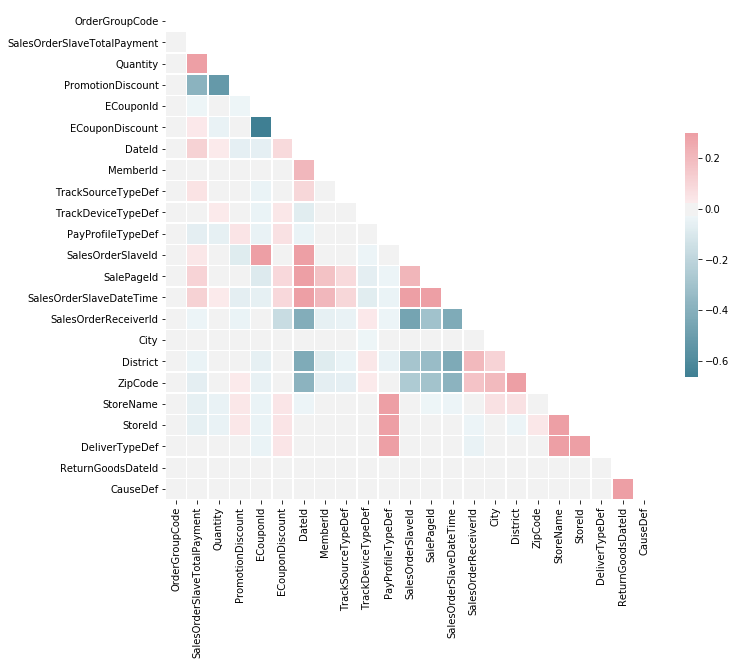

In [5]:
categorized_data = shopping_cart.copy()
categorized_data[["SalesOrderSlaveTotalPayment","Quantity","PromotionDiscount","ECouponDiscount"]] = categorized_data[["SalesOrderSlaveTotalPayment","Quantity","PromotionDiscount","ECouponDiscount"]].apply(pd.to_numeric)
cat_code = ["OrderGroupCode","ECouponId","DateId","MemberId","TrackSourceTypeDef","TrackDeviceTypeDef","PayProfileTypeDef","SalesOrderSlaveId","SalePageId","SalesOrderSlaveDateTime","SalesOrderReceiverId","City","District","ZipCode","StoreName","StoreId","DeliverTypeDef","ReturnGoodsDateId","CauseDef"]
for col in cat_code:
    categorized_data[col] = pd.Categorical(categorized_data[col])
    categorized_data[col] = categorized_data[col].cat.codes
describe_pd_data(categorized_data)

corr_matrix = categorized_data.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


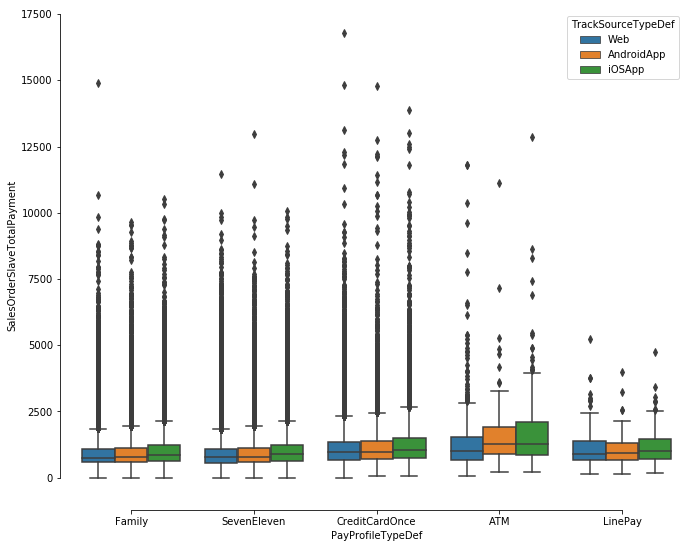

In [9]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="PayProfileTypeDef", y="SalesOrderSlaveTotalPayment",
            hue="TrackSourceTypeDef", data=shopping_cart)
sns.despine(offset=10, trim=True)


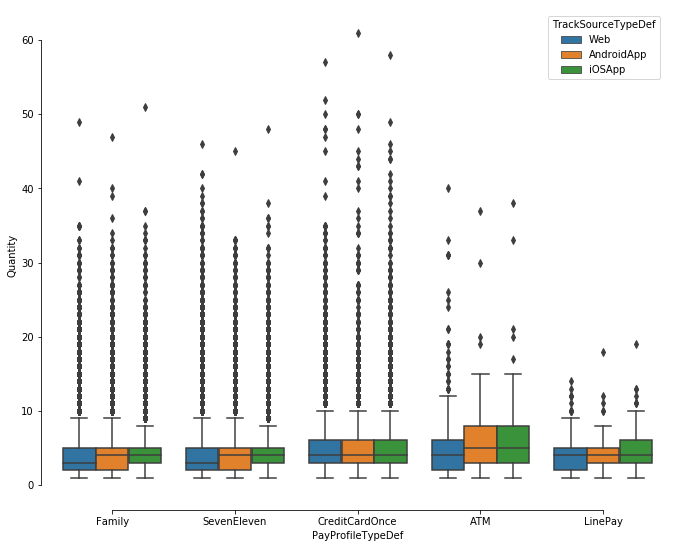

In [15]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="PayProfileTypeDef", y="Quantity",
            hue="TrackSourceTypeDef", data=shopping_cart)
sns.despine(offset=10, trim=True)


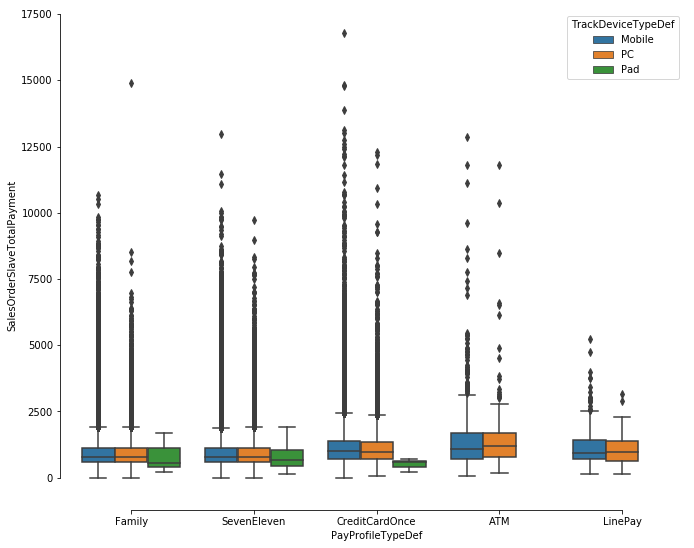

In [16]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="PayProfileTypeDef", y="SalesOrderSlaveTotalPayment",
            hue="TrackDeviceTypeDef", data=shopping_cart)
sns.despine(offset=10, trim=True)


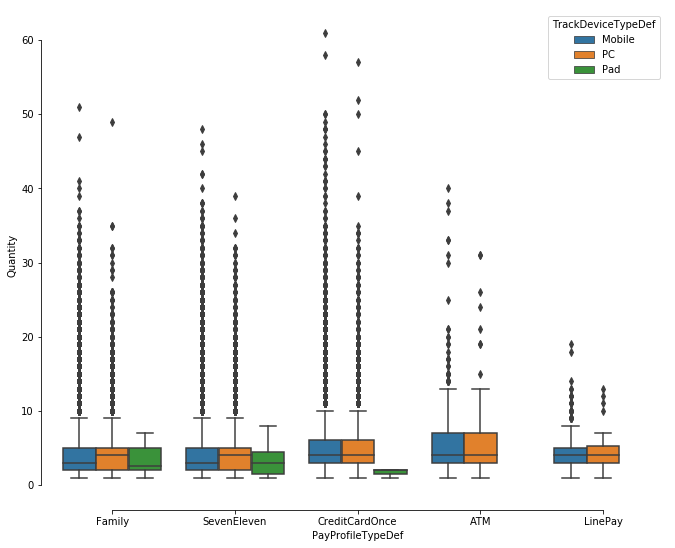

In [17]:
f, ax = plt.subplots(figsize=(11, 9))
sns.boxplot(x="PayProfileTypeDef", y="Quantity",
            hue="TrackDeviceTypeDef", data=shopping_cart)
sns.despine(offset=10, trim=True)


In [0]:
"""
# Price per product vs. Product quantity
data_price_to_quantity = [go.Scattergl(
    x=order_group["PricePerOrder"],
    y=order_group["QuantityPerOrder"],
    mode='markers',
    marker=dict(
            color='rgb(158,202,225)',
            line=dict(
                color='rgb(8,48,107)',
                width=0.5,
        ))
)]

plot_price_to_quantity = go.Figure(data=data_price_to_quantity)
py.iplot(plot_price_to_quantity, filename="91APP_PriceQuantity", fileopt="extend")
"""


In [0]:
"""
# 每個用戶
x = pd.to_numeric(order_group["OrderCount"]).loc[order_group["OrderCount"] < 60].iloc[:1000].astype(int)
y = pd.to_numeric(order_group["TotalPrice"]).loc[order_group["TotalPrice"] < 100000].iloc[:1000].astype(int)
joint_reg_price_to_quantity = sns.jointplot(x=x, y=y, kind="reg").set_axis_labels("$Order Count$", "$Total Price$")
joint_kde_price_to_quantity = sns.jointplot(x=x, y=y, kind="kde", space=0).set_axis_labels("$Order Count$", "$Total Price$")
"""


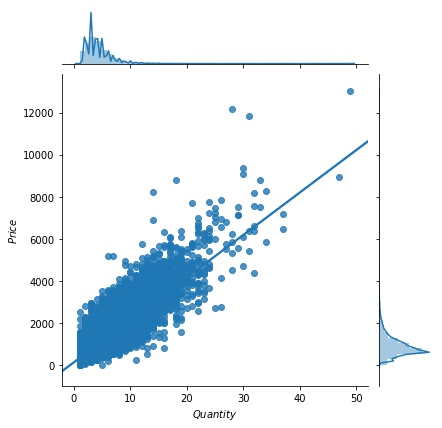

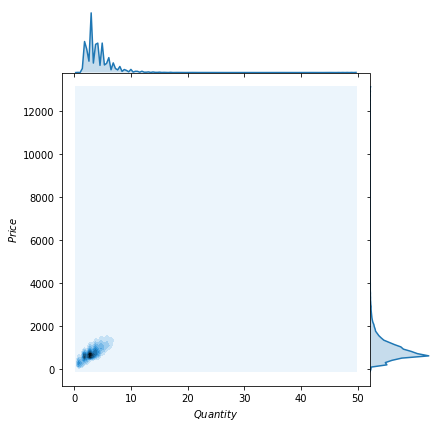

In [22]:
# 每台購物車
x = pd.to_numeric(shopping_cart["Quantity"].iloc[:100000]).astype(int)
y = pd.to_numeric(shopping_cart["SalesOrderSlaveTotalPayment"].iloc[:100000]).astype(int)
joint_reg_price_to_quantity = sns.jointplot(x=x, y=y, kind="reg").set_axis_labels("$Quantity$", "$Price$")
joint_kde_price_to_quantity = sns.jointplot(x=x, y=y, kind="kde", space=0).set_axis_labels("$Quantity$", "$Price$")


In [0]:
"""
test = target_order.iloc[:10000]
price_to_quantity = sns.jointplot(x="UnitPrice", y="Quantity", data=test, kind="kde", color="m")
price_to_quantity.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
price_to_quantity.ax_joint.collections[0].set_alpha(0)
price_to_quantity.set_axis_labels("$Price$", "$Quantity$")
"""
